# **Plotting the codon usage** 

**importing packages and data**

In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from datetime import datetime
import seaborn as sns

In [2]:
codon_usage_dict = {'AAA': 0.77, 'AAC': 1.0, 'AAG': 1.0, 'AAT': 0.89, 'ACA': 0.81, 'ACC': 1.0, 'ACG': 0.32, 'ACT': 0.7, 'AGA': 1.0, 'AGC': 1.0, 'AGG': 1.0,
 'AGT': 0.62, 'ATA': 0.36, 'ATC': 1.0, 'ATG': 1.0, 'ATT': 0.77, 'CAA': 0.36, 'CAC': 1.0, 'CAG': 1.0, 'CAT': 0.72, 'CCA': 0.83, 'CCC': 1.0, 'CCG': 0.36, 'CCT': 0.87,
 'CGA': 0.51, 'CGC': 0.88, 'CGG': 0.97, 'CGT': 0.38, 'CTA': 0.18, 'CTC': 0.49, 'CTG': 1.0, 'CTT': 0.33, 'GAA': 0.73, 'GAC': 1.0, 'GAG': 1.0, 'GAT': 0.86, 'GCA': 0.56,
 'GCC': 1.0, 'GCG': 0.27, 'GCT': 0.64, 'GGA': 0.73, 'GGC': 1.0, 'GGG': 0.75, 'GGT': 0.47, 'GTA': 0.25, 'GTC': 0.51, 'GTG': 1.0, 'GTT': 0.39, 'TAA': 0.53, 'TAC': 1.0,
 'TAG': 0.43, 'TAT': 0.8, 'TCA': 0.63, 'TCC': 0.9, 'TCG': 0.23, 'TCT': 0.77, 'TGA': 1.0, 'TGC': 1.0, 'TGG': 1.0, 'TGT': 0.84, 'TTA': 0.19, 'TTC': 1.0, 'TTG': 0.32, 'TTT': 0.84} 
# copied form rob notebook 

model = json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt"))

codon_change_df = pd.read_csv("data/redo_multDif_exons_2021_02_07/2021_03_03_codonUsage_propChange_multCds.csv")
#the ntrial is the nrow fo the codon change dict (each row is a trial)
ntrial = len(codon_change_df)

**making the plotting df**

In [3]:
plotting_df = {}
for key, value in codon_usage_dict.items(): 
    cur_mut = model[key][0]
    cur_usage = value
    cur_change_mean = float(np.mean(codon_change_df[[key]]))
    cur_change_sterr = float(np.std(codon_change_df[[key]]))/ntrial
    plotting_df[key] = [cur_mut, cur_usage, cur_change_mean, cur_change_sterr]
plotting_df = pd.DataFrame.from_dict(plotting_df, orient = "index", columns = ["mutability", "usage","chnage_mean","change_stderr"])

**plotting**

In [4]:
plotting_df

,mutability,usage,chnage_mean,change_stderr
AAA,0.000015,0.77,0.245048,0.001398
AAC,0.000020,1.00,0.043825,0.002145
AAG,0.000017,1.00,0.017424,0.001408
AAT,0.000031,0.89,0.246286,0.003315
ACA,0.000040,0.81,0.428705,0.006281
...,...,...,...,...
TGT,0.000041,0.84,0.270096,0.001589
TTA,0.000021,0.19,0.154839,0.002758
TTC,0.000014,1.00,-0.059781,0.002948
TTG,0.000017,0.32,0.222846,0.002274


In [5]:
plt.style.use("seaborn-ticks")

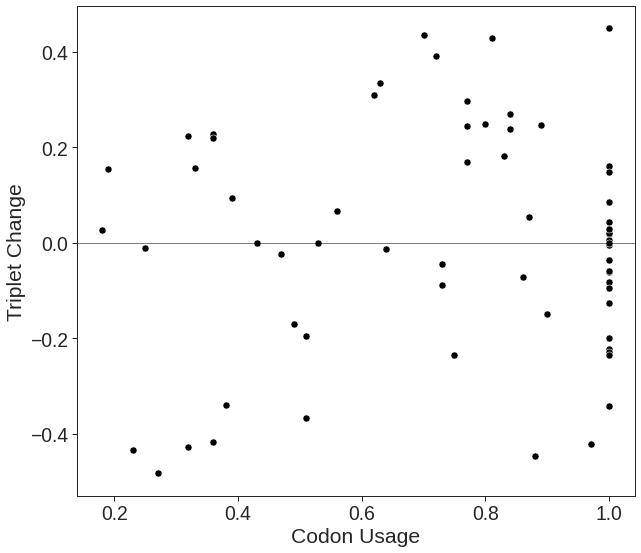

In [23]:
sns.set_context("paper", font_scale=2.2)
plt.figure(figsize=(10,9))

plot = sns.scatterplot(x="usage", y="chnage_mean", data=plotting_df, color = "k",s=50)
plot.axhline(0, color = "black", linewidth = 0.5)
plot.set(xlabel = "Codon Usage", ylabel = "Triplet Change")
plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d").replace("/", "_").replace(":", "_")
# plt.savefig("plots/Codon_Usage_{t}_multCds.png".format(t=timestamp))

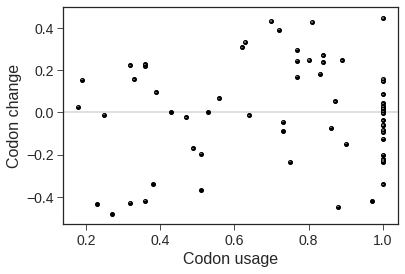

In [9]:
plt.scatter(plotting_df.usage, plotting_df.chnage_mean, color = "k", s= 16)
plt.axhline(y = 0, linewidth = 0.25, color = "k")
plt.errorbar(plotting_df.usage, plotting_df.chnage_mean, yerr = np.array(plotting_df.change_stderr), ecolor = "grey", ls = "None")
# plt.title("Codon usage vs chnage \n randomized sysnonymous codons in 100kbp cds")
plt.ylabel("Codon change", size = 16)
plt.xlabel("Codon usage", size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d").replace("/", "_").replace(":", "_")
# plt.savefig("plots/Codon-Usage_{t}_multCds.png".format(t=timestamp))

## **regression**

In [47]:
regression_mut_x = np.array(list(plotting_df.usage)).reshape((-1,1))
regression_change_y = np.array(list(plotting_df.chnage_mean))

In [48]:
regres_model =  LinearRegression().fit(regression_mut_x, regression_change_y)

In [49]:
print('r^2: ', regres_model.score(regression_mut_x, regression_change_y), "slope: ", regres_model.coef_)

r^2:  0.0058321310639696256 slope:  [0.06697095]


In [50]:
est_mutChange = sm.OLS(regression_change_y, sm.add_constant(regression_mut_x)).fit()

In [52]:
print(est_mutChange.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.3637
Date:                Wed, 03 Mar 2021   Prob (F-statistic):              0.549
Time:                        20:02:06   Log-Likelihood:                 1.5545
No. Observations:                  64   AIC:                            0.8910
Df Residuals:                      62   BIC:                             5.209
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0499      0.087     -0.577      0.5